# Example 2
---

This notebook demonstrates how to obtain differential and total cross sections for upscattering processes.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import DarkNews as dn
from DarkNews import pdg

import matplotlib.pyplot as plt

### 1) Sampling the decay of a HNL

In [25]:
# model
minimal_HNL   = dn.model.ThreePortalModel(name='minimal_HNL', m4 = 0.1, Umu4=1e-3, epsilon=0.0, gD=0.0, mzprime=100)
dark_HNL   = dn.model.ThreePortalModel(name='dark_HNL', m4 = 0.1, mzprime=1.0, Umu4=1e-3, Ud4=1 - 1e-3, epsilon=1e-3, gD=1.0)

# decay cases
common_kwargs = {'nu_parent': pdg.neutrino4, 'nu_daughter': pdg.nulight, 'final_lepton1': pdg.electron, 'final_lepton2': pdg.positron, 'h_parent': -1}

minimal_HNL_decay   = dn.FermionDileptonDecay(TheoryModel=minimal_HNL, **common_kwargs) 
dark_HNL_decay   = dn.FermionDileptonDecay(TheoryModel=dark_HNL, **common_kwargs) 

In [26]:
minimal_HNL_decay.m_parent = 0.1
minimal_HNL_decay.mzprime = 100
minimal_HNL_decay.total_width()

2.886959052507531e-26

In [27]:
def get_HNL_decay_width_s(m4_val, TheoryModel, **kwargs):
    TheoryModel.m4 = m4_val
    return dn.FermionDileptonDecay(TheoryModel=TheoryModel, **kwargs).total_width()
get_HNL_decay_width = np.vectorize(get_HNL_decay_width_s)

In [28]:
# Compute decay widths
m4vals = np.geomspace(0.1, 10, 100)
Gammas_minimal = get_HNL_decay_width(m4vals, minimal_HNL, **common_kwargs)
Gammas_dark = get_HNL_decay_width(m4vals, dark_HNL, **common_kwargs)


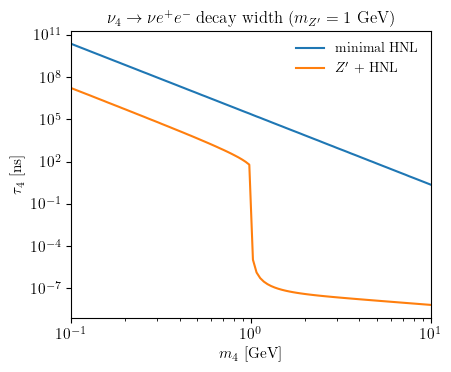

In [31]:
fig, ax = dn.plot_tools.std_fig()
ax.plot(m4vals, 1e9*dn.const.get_decay_rate_in_s(Gammas_minimal), label=r'minimal HNL')
ax.plot(m4vals, 1e9*dn.const.get_decay_rate_in_s(Gammas_dark), label=r'$Z^\prime$ + HNL')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$m_4$ [GeV]')
ax.set_ylabel(r'$\tau_4$ [ns]')
ax.set_xlim(0.1, 10)
ax.set_title(r'$\nu_4 \to \nu e^+ e^-$ decay width ($m_{Z^\prime} = 1$ GeV)')
ax.legend()
